In [54]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
dataset = MNIST(root='data/', download = True)
len(dataset)

60000

In [13]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

label:  0


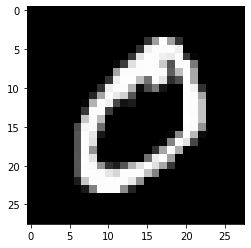

In [14]:
image, label = dataset[1]
plt.imshow(image, cmap='gray')
print("label: ", label)

In [15]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [16]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [17]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [80]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [19]:
input_size  = 28 * 28
num_classes = 10
model = nn.Linear(input_size, num_classes)

In [20]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0144,  0.0015, -0.0214,  ...,  0.0011, -0.0141,  0.0327],
         [-0.0257,  0.0050,  0.0184,  ...,  0.0030, -0.0146,  0.0063],
         [ 0.0237, -0.0329,  0.0331,  ..., -0.0237, -0.0338,  0.0079],
         ...,
         [ 0.0304,  0.0290, -0.0051,  ..., -0.0220, -0.0133,  0.0235],
         [-0.0319,  0.0063,  0.0127,  ...,  0.0229, -0.0207, -0.0346],
         [-0.0226,  0.0173, -0.0257,  ...,  0.0016, -0.0177,  0.0098]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0116, -0.0127,  0.0113, -0.0238, -0.0127,  0.0314,  0.0173,  0.0321,
         -0.0286, -0.0216], requires_grad=True)]

In [47]:
for images, labels in train_loader:
    images = images.reshape(-1,784)
    print(labels.shape)
    print(images.shape)
    outputs = model(images)
    print(outputs[0])
    break

torch.Size([128])
torch.Size([128, 784])
tensor([ 0.1742,  0.2841, -0.1660, -0.0829,  0.0900, -0.0186, -0.2147, -0.1554,
         0.0520, -0.5084], grad_fn=<SelectBackward0>)


In [44]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [38]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [40]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0350, -0.0252, -0.0124,  ...,  0.0193, -0.0153, -0.0128],
         [-0.0299, -0.0049, -0.0169,  ...,  0.0260,  0.0320,  0.0256],
         [-0.0333,  0.0259,  0.0040,  ..., -0.0081, -0.0271,  0.0254],
         ...,
         [-0.0088, -0.0117, -0.0183,  ...,  0.0033, -0.0150,  0.0156],
         [-0.0091, -0.0354, -0.0336,  ...,  0.0151,  0.0237, -0.0291],
         [-0.0043,  0.0153,  0.0297,  ...,  0.0044, -0.0297, -0.0168]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0051, -0.0079, -0.0349, -0.0297,  0.0132, -0.0313, -0.0346, -0.0078,
         -0.0095,  0.0105], requires_grad=True)]

In [52]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    print(outputs[:2])
    break

torch.Size([128, 1, 28, 28])
tensor([[-0.0459, -0.0733, -0.1691,  0.2078,  0.5565,  0.0285,  0.0772,  0.0632,
          0.1819, -0.3179],
        [ 0.0136,  0.0989,  0.0681,  0.0771,  0.1500,  0.2390,  0.1540, -0.1746,
         -0.0080,  0.0476]], grad_fn=<SliceBackward0>)


In [61]:
probs = F.softmax(outputs, dim = 1)
print(probs[:2])
print(torch.sum(probs[0]).item())

tensor([[0.0884, 0.0860, 0.0781, 0.1139, 0.1614, 0.0952, 0.1000, 0.0986, 0.1110,
         0.0673],
        [0.0943, 0.1027, 0.0996, 0.1005, 0.1081, 0.1182, 0.1085, 0.0781, 0.0923,
         0.0976]], grad_fn=<SliceBackward0>)
1.0


In [68]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(labels)

tensor([4, 5, 8, 8, 3, 6, 4, 4, 1, 6, 8, 3, 8, 3, 6, 6, 8, 4, 0, 0, 5, 1, 0, 4,
        5, 4, 4, 0, 4, 4, 6, 0, 5, 0, 3, 6, 6, 8, 5, 7, 8, 5, 6, 4, 0, 0, 8, 0,
        0, 6, 8, 6, 6, 6, 5, 8, 5, 4, 3, 0, 1, 0, 3, 8, 0, 0, 0, 0, 0, 0, 1, 8,
        3, 4, 0, 4, 8, 3, 1, 4, 0, 3, 0, 0, 0, 0, 0, 8, 8, 6, 0, 8, 8, 5, 0, 6,
        4, 4, 0, 0, 1, 8, 2, 0, 1, 8, 0, 6, 0, 8, 0, 8, 1, 4, 8, 0, 5, 1, 0, 0,
        6, 8, 6, 4, 4, 3, 8, 4])
tensor([7, 7, 3, 4, 0, 5, 9, 7, 0, 5, 8, 2, 3, 5, 8, 4, 1, 2, 0, 0, 7, 0, 5, 3,
        6, 3, 7, 0, 1, 7, 7, 5, 9, 0, 4, 6, 8, 6, 7, 2, 1, 6, 4, 7, 7, 6, 8, 0,
        9, 0, 2, 4, 6, 3, 6, 3, 7, 7, 4, 0, 2, 8, 0, 8, 6, 3, 3, 8, 0, 2, 9, 7,
        8, 7, 0, 2, 9, 6, 7, 8, 0, 5, 3, 0, 0, 9, 0, 2, 1, 6, 5, 4, 2, 7, 0, 5,
        6, 2, 2, 5, 2, 5, 1, 3, 7, 1, 0, 6, 1, 4, 8, 2, 7, 7, 1, 8, 9, 2, 6, 5,
        9, 4, 9, 7, 7, 9, 2, 2])


In [69]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
accuracy(outputs, labels)

tensor(0.1641)

In [70]:
outputs

tensor([[-0.0459, -0.0733, -0.1691,  ...,  0.0632,  0.1819, -0.3179],
        [ 0.0136,  0.0989,  0.0681,  ..., -0.1746, -0.0080,  0.0476],
        [ 0.0681,  0.0860, -0.0579,  ..., -0.4391,  0.2385, -0.1566],
        ...,
        [-0.0720, -0.0598, -0.1481,  ..., -0.1804,  0.1182, -0.1338],
        [ 0.0193, -0.1105,  0.1031,  ...,  0.0264,  0.3643, -0.5793],
        [-0.0455,  0.0467, -0.0377,  ..., -0.2097, -0.0224, -0.2978]],
       grad_fn=<AddmmBackward0>)

In [73]:
loss_fn = F.cross_entropy
loss_fn(outputs, labels)

tensor(2.3086, grad_fn=<NllLossBackward0>)

In [82]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
    
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [83]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [85]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3098912239074707, 'val_acc': 0.09236550331115723}

In [86]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9485, val_acc: 0.6205
Epoch [1], val_loss: 1.6805, val_acc: 0.7439
Epoch [2], val_loss: 1.4796, val_acc: 0.7790
Epoch [3], val_loss: 1.3273, val_acc: 0.7948
Epoch [4], val_loss: 1.2097, val_acc: 0.8081


In [87]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1172, val_acc: 0.8177
Epoch [1], val_loss: 1.0429, val_acc: 0.8234
Epoch [2], val_loss: 0.9820, val_acc: 0.8279
Epoch [3], val_loss: 0.9313, val_acc: 0.8322
Epoch [4], val_loss: 0.8884, val_acc: 0.8354


In [88]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8516, val_acc: 0.8373
Epoch [1], val_loss: 0.8197, val_acc: 0.8406
Epoch [2], val_loss: 0.7918, val_acc: 0.8428
Epoch [3], val_loss: 0.7671, val_acc: 0.8445
Epoch [4], val_loss: 0.7451, val_acc: 0.8471


Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

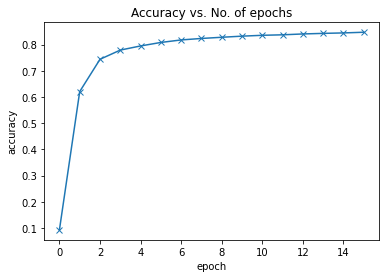

In [90]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

In [103]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

img, label = test_dataset[0]
# plt.imshow(img, cmap="gray")
print(label)
img.shape

7


torch.Size([1, 28, 28])

In [107]:
def predict_img(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)
    return pred.item()
predict_img(img, model)

7

Label: 7 , Predicted: 7


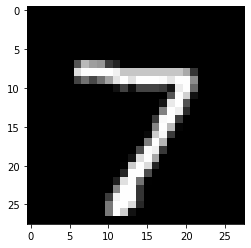

In [108]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_img(img, model))

In [114]:
for i in range(20):
    img, label = test_dataset[i]
    if label == predict_img(img, model):
        print('Label:', label, ', Predicted:', predict_img(img, model), "Yes")
    else:
        print('Label:', label, ', Predicted:', predict_img(img, model), "No")

Label: 7 , Predicted: 7 Yes
Label: 2 , Predicted: 2 Yes
Label: 1 , Predicted: 1 Yes
Label: 0 , Predicted: 0 Yes
Label: 4 , Predicted: 4 Yes
Label: 1 , Predicted: 1 Yes
Label: 4 , Predicted: 4 Yes
Label: 9 , Predicted: 9 Yes
Label: 5 , Predicted: 2 No
Label: 9 , Predicted: 9 Yes
Label: 0 , Predicted: 0 Yes
Label: 6 , Predicted: 6 Yes
Label: 9 , Predicted: 9 Yes
Label: 0 , Predicted: 0 Yes
Label: 1 , Predicted: 1 Yes
Label: 5 , Predicted: 3 No
Label: 9 , Predicted: 9 Yes
Label: 7 , Predicted: 7 Yes
Label: 3 , Predicted: 3 Yes
Label: 4 , Predicted: 4 Yes
